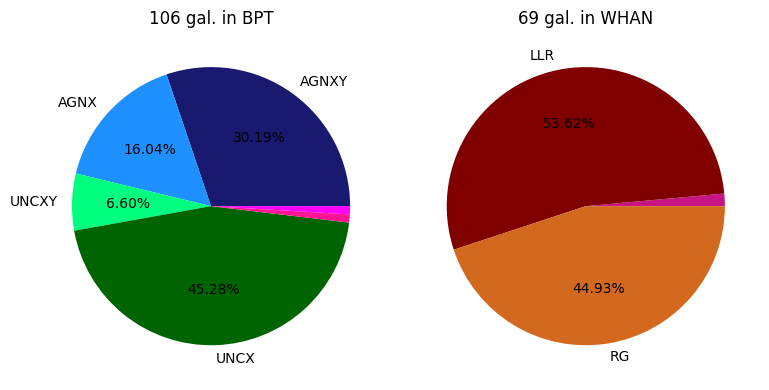

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.cosmology import WMAP9 as cosmo

def my_level_list_WHAN(data):
    list = []
    WHAN_labels = ['sAGN', 'wAGN', 'UNC', 'SF', 'ELR', 'LLR', 'RG']
    for i in range(len(data)):
        if (data[i]*100/np.sum(data)) > 2 : #2%
            list.append(WHAN_labels[i])
        else:
            list.append('')
    return list

def my_level_list_BPT(data):
    list = []
    BPT_labels = ['AGNXY', 'AGNX', 'UNCXY', 'UNCX', 'UNCY', 'SFXY', 'SFX', 'SFY', 'NOEL']
    for i in range(len(data)):
        if (data[i]*100/np.sum(data)) > 2 : #2%
            list.append(BPT_labels[i])
        else:
            list.append('')
    return list

def my_autopct(pct):
    return (f'{pct:.2f}%') if pct > 5 else ''

path = r'E:\backup\ALMA9\GAMA_ETG_OLA_abs.csv'

DataFrame = pd.read_csv(path, usecols=['SC_WHAN', 'AGN'])
WHAN_colors = ['midnightblue', 'blue', 'springgreen', 'mediumvioletred', 'red', 'maroon', 'chocolate']
BPT_colors = ['midnightblue', 'dodgerblue', 'springgreen', 'darkgreen', 'limegreen', 'mediumvioletred', 'deeppink', 'fuchsia', 'white']
dict_WHAN = {
    'sAGN' : 0,
    'wAGN' : 0,
    'UNC' : 0,
    'SF' : 0,
    'ELR' : 0,
    'LLR' : 0,
    'RG' : 0
}

dict_BPT = {
    'AGNXY' : 0,
    'AGNX' : 0,
    'UNCXY' : 0,
    'UNCX' : 0,
    'UNCY' : 0,
    'SFXY' : 0,
    'SFX' : 0,
    'SFY' : 0,
    'NOEL' : 0
}

for item in DataFrame['SC_WHAN']:
    if item[-1] == '!':
        dict_WHAN[item[:-1]] += 1

for item in DataFrame['AGN']:
    if item[-1] == '!':
        dict_BPT[item[:-1]] += 1

fig, axs = plt.subplots(1, 2, figsize=(8, 4), tight_layout=True)

data_WHAN = []
data_BPT = []

for key in dict_WHAN.keys():
    data_WHAN.append(dict_WHAN[key])

for key in dict_BPT.keys():
    data_BPT.append(dict_BPT[key])

axs[0].pie(data_BPT, labels=my_level_list_BPT(data_BPT), colors=BPT_colors, autopct=my_autopct)
axs[0].set_title(f'{sum(data_BPT)} gal. in BPT')

axs[1].pie(data_WHAN, labels=my_level_list_WHAN(data_WHAN), colors=WHAN_colors, autopct=my_autopct)
axs[1].set_title(f'{sum(data_WHAN)} gal. in WHAN')

plt.savefig(r'E:\backup\ALMA9\FIGURES\ABS_FRAC.pdf')

In [8]:
cosmo.kpc_proper_per_arcmin(0.01)  

<Quantity 12.42882653 kpc / arcmin>